In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [13]:
sentence1 = [
    'I love my dog',
    'I love my cat'
]

tokenizer = Tokenizer(num_words = 100) # max numbers of words to keep
tokenizer.fit_on_texts(sentence1)
word_index = tokenizer.word_index
print(word_index)


{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


In [14]:
sentence2 = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100) # max numbers of words to keep
tokenizer.fit_on_texts(sentence2)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentence2)

print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [15]:
test_data = [
    'I really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[4, 2, 1, 3], [1, 3, 1]]


**Notice that for the test data, 5 words string return only 4 numbers of sequence. Why? This is because "really" was not in the word index, the corpus used to build it didn't contain that word.**

**Also second sentence (5 words) ended up in sequence [1,3,1]. which is "my, dog, my". because loves and manatee was not in the word index as well**

In [16]:
sentence2 = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

New_tokenizer = Tokenizer(num_words = 100, oov_token = '<OOV>')
New_tokenizer.fit_on_texts(sentence2)
word_index = New_tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentence2)

test_data = [
    'I really love my dog',
    'my dog loves my manatee'
]

test_seq = New_tokenizer.texts_to_sequences(test_data)
print(test_seq)
print(word_index)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]
{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


**Now you can see that those undefined words has been replaced by token <OOV>, and the length of sentence is now correct**

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
padded = pad_sequences(sequences)
print(padded)

[[ 0  0  0  4  2  1  3]
 [ 0  0  0  4  2  1  6]
 [ 0  0  0  5  2  1  3]
 [ 7  5  8  1  3  9 10]]


In [19]:
padded = pad_sequences(sequences, padding = 'post')
print(padded)

[[ 4  2  1  3  0  0  0]
 [ 4  2  1  6  0  0  0]
 [ 5  2  1  3  0  0  0]
 [ 7  5  8  1  3  9 10]]


In [20]:
padded = pad_sequences(sequences, truncating = 'post', maxlen = 9)
print(padded)

[[ 0  0  0  0  0  4  2  1  3]
 [ 0  0  0  0  0  4  2  1  6]
 [ 0  0  0  0  0  5  2  1  3]
 [ 0  0  7  5  8  1  3  9 10]]


In [21]:
padded = pad_sequences(sequences, truncating = 'pre', maxlen = 9)
print(padded)

[[ 0  0  0  0  0  4  2  1  3]
 [ 0  0  0  0  0  4  2  1  6]
 [ 0  0  0  0  0  5  2  1  3]
 [ 0  0  7  5  8  1  3  9 10]]


In [22]:
import json

In [23]:
# with open('Sarcasm_Headlines_Dataset.json', 'r') as f:
#     datastore = json.load(f)
    
data = [json.loads(line) for line in open('Sarcasm_Headlines_Dataset.json', 'r')]
data
    
sentences = []
labels = []
urls = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [32]:
tokenizer = Tokenizer(oov_token = '<OOV>')
tokenizer.fit_on_texts(sentences) # we will create token for every words in the corpus
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding = 'post')
# print(word_index)
print(padded[0])
print(padded.shape)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [40]:
# slice them into training and testing
training_size = 20000
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'


training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# but we want our Neural net only see the training set, not the testing set

In [42]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, 
                                truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length,
                              padding = padding_type, truncating = trunc_type)

In [46]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [49]:
# build text-classification model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                   validation_data = (testing_padded, testing_labels), verbose = 2)

Epoch 1/30
625/625 - 1s - loss: 0.6761 - accuracy: 0.5623 - val_loss: 0.6315 - val_accuracy: 0.6532
Epoch 2/30
625/625 - 1s - loss: 0.4821 - accuracy: 0.7970 - val_loss: 0.4045 - val_accuracy: 0.8307
Epoch 3/30
625/625 - 1s - loss: 0.3292 - accuracy: 0.8697 - val_loss: 0.3616 - val_accuracy: 0.8483
Epoch 4/30
625/625 - 1s - loss: 0.2742 - accuracy: 0.8918 - val_loss: 0.3468 - val_accuracy: 0.8551
Epoch 5/30
625/625 - 1s - loss: 0.2374 - accuracy: 0.9076 - val_loss: 0.3433 - val_accuracy: 0.8572
Epoch 6/30
625/625 - 1s - loss: 0.2090 - accuracy: 0.9190 - val_loss: 0.3494 - val_accuracy: 0.8521
Epoch 7/30
625/625 - 1s - loss: 0.1870 - accuracy: 0.9300 - val_loss: 0.3811 - val_accuracy: 0.8393
Epoch 8/30
625/625 - 1s - loss: 0.1681 - accuracy: 0.9390 - val_loss: 0.3763 - val_accuracy: 0.8512
Epoch 9/30
625/625 - 1s - loss: 0.1544 - accuracy: 0.9428 - val_loss: 0.3787 - val_accuracy: 0.8535
Epoch 10/30
625/625 - 1s - loss: 0.1391 - accuracy: 0.9507 - val_loss: 0.3939 - val_accuracy: 0.8521

In [60]:
check_sentences = [
    "granny starting to fear spiders in the garden might be real",
    "the weather today is bright and sunny"
]

sequences = tokenizer.texts_to_sequences(check_sentences)
padded = pad_sequences(sequences, maxlen = max_length,
                      padding = padding_type,
                      truncating = trunc_type)

ans = model.predict(padded)
print(np.round(ans,4))

[[0.715]
 [0.   ]]


**Generating Text**

**recurrent neural networks**

**it takes the sequence of data into account when it is learning.**


**on the previous example classifier for text, the order of the words appear in the sentence doesn't really matter
What really determined teh sentiment was the vector that resulted in adding up all of the individual vectors for 
the individual words. the direction of the vector roughly gave us the sentiments.**

In [63]:
# long short term Memory for NLP

In [64]:
# Today has a beatiful blue <?>  
# since we have lots of context close to the word, and most notably the word blue.

# I live in Ireland, so at school they made me learn how to speak <?> 
# the possible answer would be "Gaelic" since it is relative to country Ireland,
# but how do we do that? because country determine the language, the word Ireland is very back in the sentence
# so when using recurrent neural networks, this would be hard to archieve
# However, LSTM (long short term memory) Neural network has something called Cell state, which is a context can be
# maintained across many timestamps, and which can bring meaning from the beginning of the sentence to bear.

In [66]:
# lets try LSTM neural network:
# bidirectional can learn your sentences both forward and backward 
# and discover the best parameters for each, and then merge them.

# LSTM_model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),  
#     tf.keras.layers.Dense(64, activation = 'relu'),
#     tf.keras.layers.Dense(1, activation = 'sigmoid')
    
# ])

In [87]:
tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = [] # create an emply list of sequences

for line in corpus: # for each line in the corpus
    # create a list of tokens, this would give me the text to sequences for the current line
    token_list = tokenizer.texts_to_sequences([line])[0] 
#     print(token_list)
    # go through this list and generate n grams from that, so (1,2,3) -> (1,2) + (1,2,3) 
    # when you see 1, 2 is next, when you see 1,2. 3 is next
    for i in range(1, len(token_list)): 
        n_gram_sequences = token_list[:i+1]
        input_sequences.append(n_gram_sequences)

# first line :[51, 12, 96, 1217, 48, 2, 69]   
# input_sequences = subset of first line
print(input_sequences[0:6])

[[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69]]


In [90]:
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

print(input_sequences)

[[   0    0    0 ...    0   51   12]
 [   0    0    0 ...   51   12   96]
 [   0    0    0 ...   12   96 1217]
 ...
 [   0    0    0 ...    0   47  105]
 [   0    0    0 ...   47  105  138]
 [   0    0    0 ...  105  138  184]]


In [91]:
X, labels = input_sequences[:,:-1], input_sequences[:,-1]

print(X)
print(labels)

[[  0   0   0 ...   0   0  51]
 [  0   0   0 ...   0  51  12]
 [  0   0   0 ...  51  12  96]
 ...
 [  0   0   0 ...   0   0  47]
 [  0   0   0 ...   0  47 105]
 [  0   0   0 ...  47 105 138]]
[  12   96 1217 ...  105  138  184]


In [94]:
# set Y to be categorical and one hot encoded
Y = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

model = Sequential() # start with a sequential
# adds an embedding, since it is massive numbers of words, set dimension to 240
model.add(Embedding(total_words, 240, input_length = max_sequence_len-1)) 
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation = 'softmax'))
adam = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history = model.fit(X, Y, epochs = 100, verbose = 1)

Epoch 1/100
377/377 [==============================] - 15s 41ms/step - loss: 6.6564 - accuracy: 0.0744
Epoch 2/100
377/377 [==============================] - 16s 41ms/step - loss: 5.7188 - accuracy: 0.1216
Epoch 3/100
377/377 [==============================] - 16s 41ms/step - loss: 5.1410 - accuracy: 0.1570
Epoch 4/100
377/377 [==============================] - 16s 42ms/step - loss: 4.9152 - accuracy: 0.1820
Epoch 5/100
377/377 [==============================] - 16s 42ms/step - loss: 4.0981 - accuracy: 0.2422
Epoch 6/100
377/377 [==============================] - 16s 42ms/step - loss: 3.1744 - accuracy: 0.3301
Epoch 7/100
377/377 [==============================] - 16s 43ms/step - loss: 2.6895 - accuracy: 0.3964
Epoch 8/100
377/377 [==============================] - 17s 46ms/step - loss: 2.3362 - accuracy: 0.4620
Epoch 9/100
377/377 [==============================] - 16s 43ms/step - loss: 2.0368 - accuracy: 0.5289
Epoch 10/100
377/377 [==============================] - 16s 43ms/step - l

377/377 [==============================] - 16s 42ms/step - loss: 1.0989 - accuracy: 0.7453
Epoch 80/100
377/377 [==============================] - 16s 42ms/step - loss: 1.1584 - accuracy: 0.7353
Epoch 81/100
377/377 [==============================] - 16s 42ms/step - loss: 1.0978 - accuracy: 0.7418
Epoch 82/100
377/377 [==============================] - 16s 42ms/step - loss: 1.0547 - accuracy: 0.7495
Epoch 83/100
377/377 [==============================] - 16s 42ms/step - loss: 1.0452 - accuracy: 0.7542
Epoch 84/100
377/377 [==============================] - 16s 42ms/step - loss: 1.0393 - accuracy: 0.7556
Epoch 85/100
377/377 [==============================] - 16s 42ms/step - loss: 1.0476 - accuracy: 0.7541
Epoch 86/100
377/377 [==============================] - 16s 43ms/step - loss: 1.0530 - accuracy: 0.7523
Epoch 87/100
377/377 [==============================] - 16s 43ms/step - loss: 1.0423 - accuracy: 0.7556
Epoch 88/100
377/377 [==============================] - 16s 42ms/step - loss:

In [98]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()

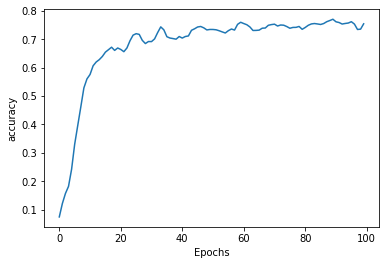

In [99]:
plot_graphs(history, 'accuracy')

In [101]:
seed_text = 'I made a poetry machine'
next_words = 20

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen= max_sequence_len - 1, padding='pre')
    predicted = model.predict_classes(token_list, verbose = 0)
    output_word = ''
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' ' + output_word
print("****************")
print(seed_text)

****************
I made a poetry machine back to beautiful vale of tralee in a tiny town from town across ye down then till wid irish lass
